# New section

In [ ]:
import os
cwd = os.getcwd()
print(cwd)

/content


In [ ]:
!ls -lh /content/*
!cat /content/sample_data/README.md

/content/drive:
total 8.0K
drwx------ 4 root root 4.0K Jan 21 19:04 MyDrive
drwx------ 2 root root 4.0K Jan 21 19:04 Shareddrives

/content/sample_data:
total 55M
-rwxr-xr-x 1 root root 1.7K Jan  1  2000 anscombe.json
-rw-r--r-- 1 root root 295K Jan  7 14:33 california_housing_test.csv
-rw-r--r-- 1 root root 1.7M Jan  7 14:33 california_housing_train.csv
-rw-r--r-- 1 root root  18M Jan  7 14:33 mnist_test.csv
-rw-r--r-- 1 root root  35M Jan  7 14:33 mnist_train_small.csv
-rwxr-xr-x 1 root root  930 Jan  1  2000 README.md
This directory includes a few sample datasets to get you started.

*   `california_housing_data*.csv` is California housing data from the 1990 US
    Census; more information is available at:
    https://developers.google.com/machine-learning/crash-course/california-housing-data-description

*   `mnist_*.csv` is a small sample of the
    [MNIST database](https://en.wikipedia.org/wiki/MNIST_database), which is
    described at: http://yann.lecun.com/exdb/mnist/

*   `an

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing dependencies
import numpy as np  #python library for scientific computing
import pandas as pd #python library for data analysis and dataframes e.g. to import spreadsheets

In [ ]:
%ls /content/drive/MyDrive/BigDA/6100Shared/_Data/ex1data2.txt
%cat /content/drive/MyDrive/BigDA/6100Shared/_Data/ex1data2.txt | head 
!echo " "
print("\n")
%cat /content/drive/MyDrive/BigDA/6100Shared/_Data/ex1data2.txt | tail -5

# /content/drive/MyDrive/BigDA/6100Shared/_Data/ex1data2.txt

/content/drive/MyDrive/BigDA/6100Shared/_Data/ex1data2.txt
2104,3,399900
1600,3,329900
2400,3,369000
1416,2,232000
3000,4,539900
1985,4,299900
1534,3,314900
1427,3,198999
1380,3,212000
1494,3,242500
 


2567,4,314000
1200,3,299000
852,2,179900
1852,4,299900
1203,3,239500


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BigDA/6100Shared/_Data/ex1data2.txt', header= None)
df.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
data = df.copy()
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
data.columns =(['Size','Bedroom','Price'])
data.head()

,Size,Bedroom,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
data.drop('Bedroom', axis=1, inplace=True)


In [ ]:
data1 = data.sample(frac=0.5)
data1.head()

,Size,Price
12,1890,329999
17,1236,199900
21,1888,255000
28,2200,475000
20,1767,252900


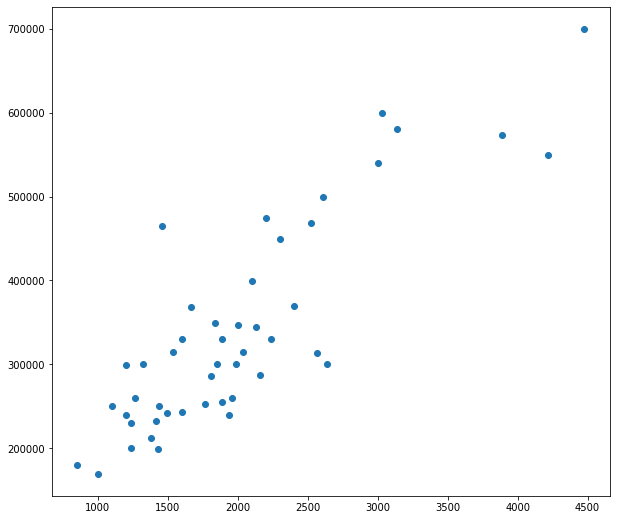

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 9.0)

# Preprocessing Input data

X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()


**Using Absolute Error to fit a Regression line to the given data**

We Know that,

    Mean Absolute Error = (1/n)*Sigma(|Y - Y_Pred|) = f(x)
In Order to fit a Line, we need the values of Slope and Intercept of a line.
By using the Gradient Descent, we can find the slope(m) and Intercept(c).
To get those values we need to differentiate cost function f(x) with respect to "m", and "c".


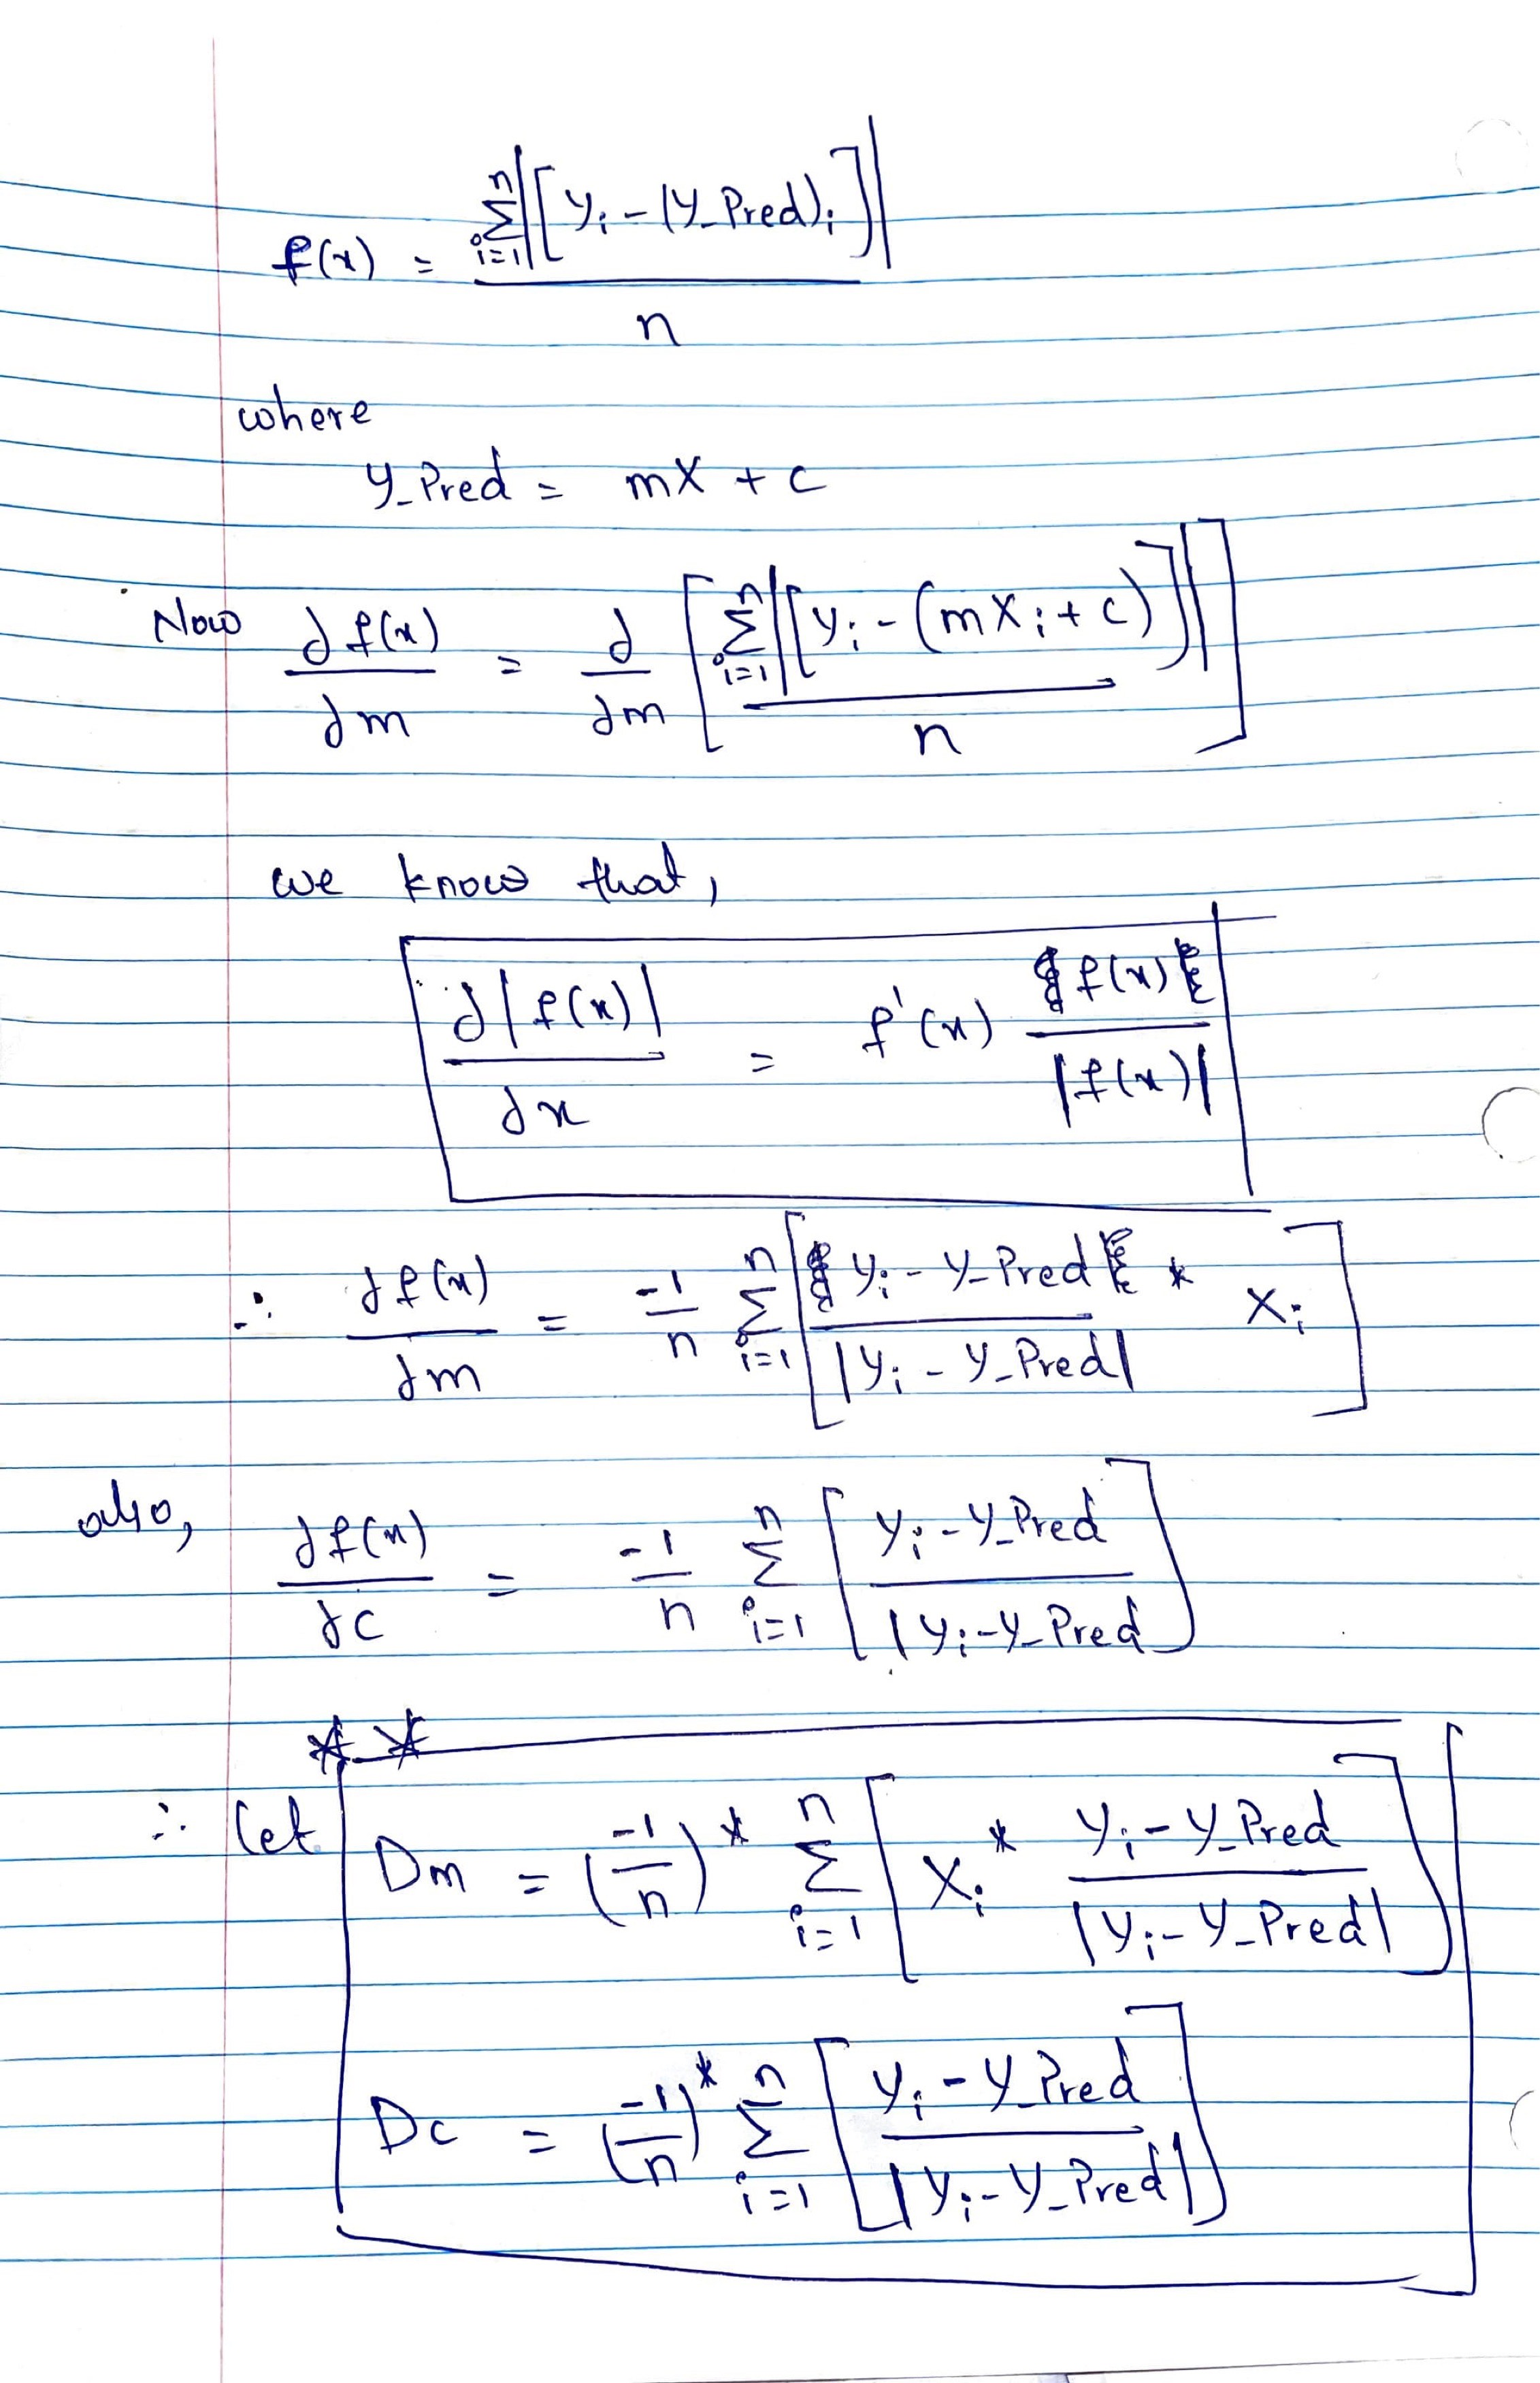






We graph cost function as a function of parameter estimates i.e. parameter range of our hypothesis function and the cost resulting from selecting a particular set of parameters. The way to do this is taking derivative of cost function as explained in the above figure. Gradient Descent step-downs the cost function in the direction of the steepest descent. The size of each step is determined by parameter known as Learning Rate and we need to iterate this loop until we get the values of slope and intercept such that these values minimize the cost function that is the mean absolute error.


let us consider slope and intercept values are zero at the starting of the iteration, and we need to update these values using:

m = m - LRate * Dm  
c = c - LRate * Dc

In [ ]:
m = 0
c = 0

LRate = 0.001 # The learning Rate
itr = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(itr): 
    Y_pred = m*X + c  # The current predicted value of Y
    Dm = (-1/n) * (sum((X * (Y - Y_pred))/abs(Y - Y_pred)))  # Derivative wrt m
    Dc = (-1/n) * sum((Y - Y_pred)/abs(Y - Y_pred))  # Derivative wrt c
    m = m - LRate * Dm  # Update m
    c = c - LRate * Dc  # Update c
    
print (m, c)

161.95489361701922 0.192510638297872


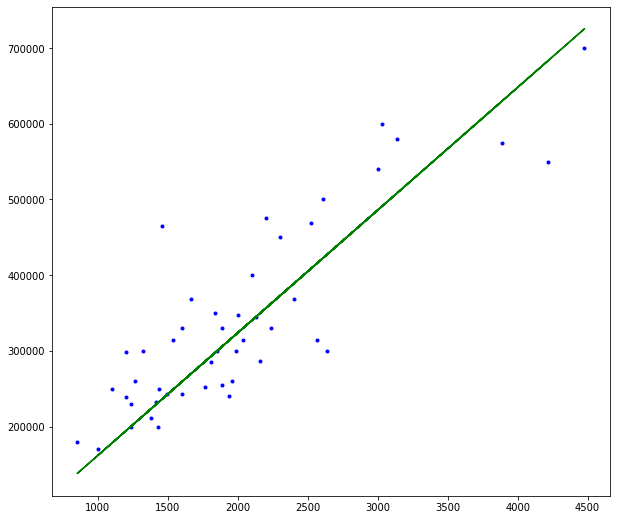

In [ ]:
plt.plot(X, Y, 'b.')


line_values = [m * v + c for v in X]
plt.plot(X , line_values, 'g-')
plt.show()